In [2]:
import sys
sys.path.extend(['/Users/zsolt/Colloid_git/TractionRheoscopy'])
from data_analysis import static as da
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from importlib import reload
from scipy.spatial import cKDTree

In [5]:
tmp = da.loadExperiment()

In [6]:
sedPos = tmp['sedPos']

In [7]:
sedPos

x (um, imageStack)  y (um, imageStack)  z (um, imageStack)  \
frame particle                                                               
0     0                  23.480112            2.221875           27.385583   
      1                  31.531264            2.180390           27.351286   
      2                  37.789111            2.119240           27.275850   
      3                  39.408522            2.436315           27.277841   
      4                  35.347537            2.748365           27.335966   
...                            ...                 ...                 ...   
89    1489977           200.492249          221.169243           71.848828   
      1489978           187.204307          202.418158           83.305471   
      1489979           188.845862          225.415862           83.684483   
      1489980           193.989494          194.780281           83.924158   
      1489981           186.063189          201.029539           85.103917   

                        x_std          y_std          z_std  
frame particle                                               
0     0              0.160625       0.149919       0.139626  
      1              0.121123       0.120859       0.108598  
      2              0.130098       0.134635       0.117372  
      3              0.110703       0.114330       0.101162  
      4              0.134831       0.134550       0.121837  
...                       ...            ...            ...  
89    1489977        0.121115       0.122348       0.104224  
      1489978             NaN            NaN            NaN  
      1489979        1.279382       0.922309       1.188493  
      1489980   119852.822302  111242.080747  128126.585762  
      1489981             NaN            NaN            NaN  

[87508017 rows x 6 columns]

In [21]:
sedPos[keys[0]].max()

87.31640625

In [29]:
idx_complete = sedPos.xs(0,level='frame').index.intersection(sedPos.xs(89, level='frame').index)

In [31]:
idx_complete

Int64Index([    50,     56,     57,     61,     65,     66,     68,     69,
                73,     75,
            ...
            966598, 966599, 966602, 966606, 966607, 966608, 966609, 966611,
            966612, 966614],
           dtype='int64', name='particle', length=906416)

In [35]:
keys = ['{} (um, imageStack)'.format(x) for x in ['z','y','x']]
pos_t0_np = sedPos.xs(0,level='frame').loc[idx_complete][keys].to_numpy()

In [36]:
# create a search tree
tree = cKDTree(pos_t0_np)

In [43]:
pt_px = np.array([566,554,869])
px2Micron = np.array([0.15,0.115,0.115])
tree.query_ball_point(px2Micron * pt_px,1.4)

[698911, 698875]

In [58]:
idx_complete[698911]
idx_complete[[698911,698875]]

Int64Index([741931, 741894], dtype='int64', name='particle')

In [50]:
sedPos.loc[(slice(None),idx_complete[698875]),:]

,,"x (um, imageStack)","y (um, imageStack)","z (um, imageStack)",x_std,y_std,z_std
frame,particle,,,,,,
0,741894,101.008859,63.647446,84.076369,0.067141,0.063256,0.080229
1,741894,101.115358,63.720246,84.009219,0.077156,0.074086,0.094817
2,741894,101.315295,63.682067,84.009802,0.069257,0.067153,0.079986
3,741894,101.509522,63.677431,83.983477,0.064819,0.063438,0.076992
4,741894,101.702579,63.699809,83.936610,0.068098,0.065139,0.079150
...,...,...,...,...,...,...,...
85,741894,101.343960,63.713218,83.860579,0.071504,0.069840,0.091154
86,741894,101.326176,63.736641,83.877647,0.076845,0.073588,0.098150
87,741894,101.354930,63.725001,83.846867,0.063177,0.061967,0.081589


In [51]:
sedPos.loc[(slice(None),idx_complete[698911]),:]

,,"x (um, imageStack)","y (um, imageStack)","z (um, imageStack)",x_std,y_std,z_std
frame,particle,,,,,,
0,741931,99.864035,62.634820,84.123952,0.072707,0.072622,0.098856
1,741931,99.975375,62.702001,84.056459,0.078645,0.077916,0.101947
2,741931,100.186904,62.661526,84.028756,0.067581,0.065989,0.078690
3,741931,100.369344,62.658388,83.995888,0.069558,0.069382,0.090026
4,741931,100.551246,62.677177,83.970475,0.068779,0.067763,0.086148
...,...,...,...,...,...,...,...
85,741931,100.171167,62.696552,83.925593,0.072707,0.071508,0.097997
86,741931,100.176196,62.734281,83.890749,0.070681,0.069299,0.088749
87,741931,100.202260,62.706212,83.826674,0.061787,0.061236,0.080315


<AxesSubplot:xlabel='x (um, imageStack)', ylabel='y (um, imageStack)'>

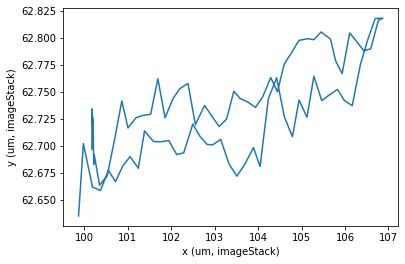

In [53]:
sns.lineplot(x=keys[2], y=keys[1], data = sedPos.loc[(slice(None),idx_complete[698911]),:],sort=False)

In [59]:
from data_analysis import grid_track

In [84]:
reload(grid_track)
fPath = '/Users/zsolt/Colloid_git/TractionRheoscopy/metaDataYAML/tfrGel10212018A_shearRun10292018f_metaData.yaml'
meta = grid_track.loadMetaData(fPath,'data_analysis')
line = meta['grid']['lines'][0]
out = []
for line in meta['grid']['lines']:
    if line['t'] == 0 : out.append(grid_track.findGridParticle(sedPos,line,cutoff_dict={'d':5, 'units':'um'}))
grid_particle = pd.concat(out)

In [105]:
grid_idx = grid_particle.index
grid_idx

Int64Index([663793, 663807, 663842, 663852, 663891, 663893, 663911, 663915,
            663926, 663942,
            ...
            915392, 915394, 915401, 915417, 915425, 915426, 915431, 915441,
            915461, 915462],
           dtype='int64', name='particle', length=7399)

In [90]:
_pos = sedPos.xs(0,level='frame').loc[grid_idx][['{} (um, imageStack)'.format(x) for x in ['x','y','z']]]

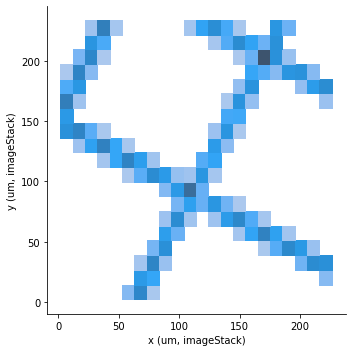

In [91]:
sns.displot(_pos,x='x (um, imageStack)', y = 'y (um, imageStack)')

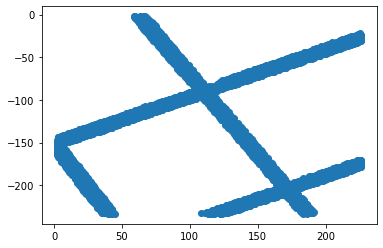

In [104]:
from matplotlib import pyplot as plt
x = _pos['x (um, imageStack)'].to_numpy()
y = -1*_pos['y (um, imageStack)'].to_numpy()
z = _pos['z (um, imageStack)'].to_numpy()
plt.scatter(x,y)


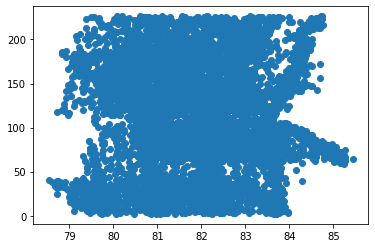

In [94]:
plt.scatter(z,x)

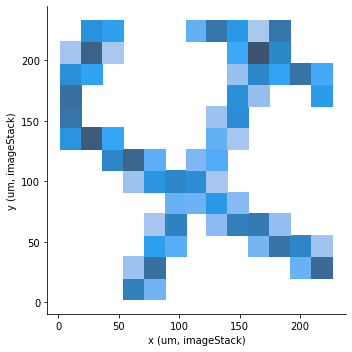

In [103]:
_pos_zSmall = _pos.loc[grid_particle['v_z (um, imageStack)'] > - 1.5]
sns.displot(_pos_zSmall, x = 'x (um, imageStack)', y='y (um, imageStack)')

In [98]:
grid_particle

,"v_z (um, imageStack)","v_y (um, imageStack)","v_x (um, imageStack)"
particle,,,
663793,-4.968334,0.129417,-0.323195
663807,-4.900817,-0.043046,-0.001292
663842,-3.413599,-1.077437,1.947365
663852,-4.778469,-0.349112,0.570022
663891,-4.685190,0.459260,-0.932002
...,...,...,...
915426,-3.307145,-1.345742,2.660442
915431,-2.948175,-0.782302,1.527338
915441,-2.887309,-1.706386,3.397889


In [122]:
posKeys = ['{} (um, imageStack)'.format(x) for x in ['x','y','z']]

t=0
(sedPos.xs(40,level='frame').loc[grid_idx][posKeys] - sedPos.xs(0,level='frame').loc[grid_idx][posKeys]).describe()

,"x (um, imageStack)","y (um, imageStack)","z (um, imageStack)"
count,1374.000000,1374.000000,1374.000000
mean,7.099510,0.178501,-0.731720
std,0.068126,0.058016,0.054711
min,6.895677,0.043836,-0.939448
25%,7.046416,0.132608,-0.771006
50%,7.093438,0.178432,-0.730615
75%,7.159836,0.222424,-0.692693
max,7.248984,0.301681,-0.516098


In [124]:
# given grid_idx, get a list of trajectories over all time points (quickly)
grid_idx = grid_particle[grid_particle['v_z (um, imageStack)'] > -1].index
grid_idx

Int64Index([664925, 665441, 665445, 665450, 665471, 665480, 665481, 665483,
            665484, 665488,
            ...
            910428, 910436, 910437, 910441, 910447, 910461, 910466, 910473,
            910484, 914576],
           dtype='int64', name='particle', length=1374)

In [125]:
sedPos

x (um, imageStack)  y (um, imageStack)  z (um, imageStack)  \
frame particle                                                               
0     0                  23.480112            2.221875           27.385583   
      1                  31.531264            2.180390           27.351286   
      2                  37.789111            2.119240           27.275850   
      3                  39.408522            2.436315           27.277841   
      4                  35.347537            2.748365           27.335966   
...                            ...                 ...                 ...   
89    1489977           200.492249          221.169243           71.848828   
      1489978           187.204307          202.418158           83.305471   
      1489979           188.845862          225.415862           83.684483   
      1489980           193.989494          194.780281           83.924158   
      1489981           186.063189          201.029539           85.103917   

                        x_std          y_std          z_std  
frame particle                                               
0     0              0.160625       0.149919       0.139626  
      1              0.121123       0.120859       0.108598  
      2              0.130098       0.134635       0.117372  
      3              0.110703       0.114330       0.101162  
      4              0.134831       0.134550       0.121837  
...                       ...            ...            ...  
89    1489977        0.121115       0.122348       0.104224  
      1489978             NaN            NaN            NaN  
      1489979        1.279382       0.922309       1.188493  
      1489980   119852.822302  111242.080747  128126.585762  
      1489981             NaN            NaN            NaN  

[87508017 rows x 6 columns]

In [126]:
sedPos.index

MultiIndex([( 0,       0),
            ( 0,       1),
            ( 0,       2),
            ( 0,       3),
            ( 0,       4),
            ( 0,       5),
            ( 0,       6),
            ( 0,       7),
            ( 0,       8),
            ( 0,       9),
            ...
            (89, 1489972),
            (89, 1489973),
            (89, 1489974),
            (89, 1489975),
            (89, 1489976),
            (89, 1489977),
            (89, 1489978),
            (89, 1489979),
            (89, 1489980),
            (89, 1489981)],
           names=['frame', 'particle'], length=87508017)

In [172]:
grid_idx_multi = pd.MultiIndex.from_product([range(90), np.unique(grid_idx)])
sedPos['x (um, imageStack)'].loc[grid_idx_multi]


0   664925     70.650483
    665441     88.319731
    665445     80.898505
    665450     84.080825
    665471     78.720879
                 ...    
89  961917    195.025987
    961918    186.553192
    961967    212.847993
    961971    210.483819
    962032    187.543445
Name: x (um, imageStack), Length: 123120, dtype: float64

In [194]:
tmp = sedPos.loc[grid_idx_multi]
tmp.unstack(level=0)['x (um, imageStack)']
_idx = tmp.unstack(level=0)['x (um, imageStack)'].index

In [195]:
pd.DataFrame((tmp.unstack(level=0)['x (um, imageStack)'].to_numpy().T - tmp.unstack(level=0)['x (um, imageStack)'].to_numpy().T[0]).T, index=_idx)

,0,1,2,3,4,5,6,7,8,9,...,80,81,82,83,84,85,86,87,88,89
664925,0.0,0.103931,0.311453,0.505894,0.685059,0.836423,0.988498,1.191561,1.388968,1.542326,...,0.342117,0.338293,0.334664,0.355985,0.334450,0.308078,0.302943,0.314073,0.310318,0.322453
665441,0.0,0.108319,0.327668,0.522219,0.693497,0.843932,1.015828,1.198683,1.390572,1.559286,...,0.374213,0.363939,0.378340,0.377448,0.367112,0.359211,0.343384,0.359592,0.341055,0.354709
665445,0.0,0.099847,0.320688,0.509001,0.690445,0.853180,1.012861,1.194092,1.373901,1.529516,...,0.344731,0.353697,0.350294,0.362174,0.330365,0.318557,0.312321,0.337862,0.339078,0.335377
665450,0.0,0.096846,0.312077,0.504635,0.675312,0.837513,0.991851,1.181977,1.371611,1.530730,...,0.350981,0.339770,0.355018,0.367368,0.351103,0.301573,0.298024,0.338521,0.314861,0.330215
665471,0.0,0.120246,0.316629,0.516083,0.677390,0.831686,1.015137,1.205300,1.383112,1.543637,...,0.379041,0.390067,0.379474,0.369477,0.361168,0.354228,0.347097,0.359649,0.331184,0.358286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
961917,0.0,0.090186,0.313252,0.503648,0.681935,0.831056,0.993569,1.198792,1.381301,1.547420,...,0.343343,0.341167,0.344280,0.344048,0.322383,0.320515,0.299357,0.325080,0.317291,0.317873
961918,0.0,0.114616,0.322490,0.502675,0.693311,0.849668,1.025784,1.204575,1.383833,1.556250,...,0.380852,0.357905,0.366630,0.371812,0.354644,0.345823,0.329917,0.357517,0.338926,0.345988
961967,0.0,0.093614,0.312252,0.493484,0.679232,0.829573,1.002548,1.185803,1.378993,1.552569,...,0.350080,0.342859,0.348947,0.350010,0.330960,0.307225,0.313542,0.320901,0.306945,0.314942
961971,0.0,0.141230,0.348289,0.532562,0.713751,0.854944,1.030447,1.225803,1.429746,1.575282,...,0.393183,0.371312,0.393672,0.388930,0.358225,0.351334,0.348534,0.370156,0.353259,0.358924


## Compute shear direction from grid particle displacments. 

Options
 - fit a line through x and y displacements for all times
 - compute average of y/x (angle)
 - average x and y for all the particles and fit those points. 

In [306]:
posKeys = ['{} (um, imageStack)'.format(x) for x in ['x','y','z']]
grid_idx = grid_particle[grid_particle['v_z (um, imageStack)'] > -1.5].index
grid_idx_multi = pd.MultiIndex.from_product([range(90), np.unique(grid_idx)])
tmp = sedPos.loc[grid_idx_multi]

In [196]:
tmp = sedPos.loc[grid_idx_multi]
_idx = tmp.unstack(level=0)['x (um, imageStack)'].index
dx_df = pd.DataFrame((tmp.unstack(level=0)['x (um, imageStack)'].to_numpy().T - tmp.unstack(level=0)['x (um, imageStack)'].to_numpy().T[0]).T, index=_idx)  
dy_df = pd.DataFrame((tmp.unstack(level=0)['y (um, imageStack)'].to_numpy().T - tmp.unstack(level=0)['y (um, imageStack)'].to_numpy().T[0]).T, index=_idx)

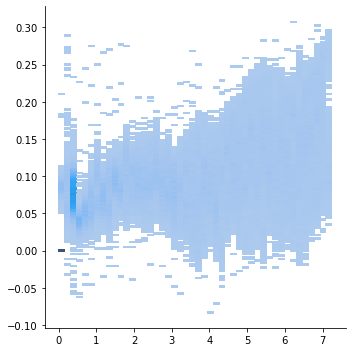

In [198]:
sns.displot(x = dx_df.to_numpy().flatten(), y = dy_df.to_numpy().flatten())

<AxesSubplot:xlabel='mean', ylabel='mean'>

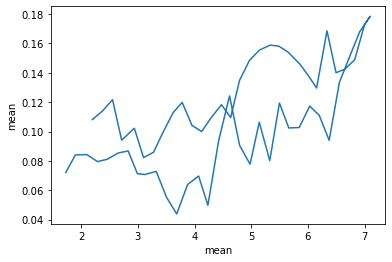

In [225]:
# i think this method is flawed. 
# we should compute the angle, then average, or avg or single particle trajectories. 
xbar = dx_df.describe().loc['mean']
ybar = dy_df.describe().loc['mean']
sns.lineplot(x=xbar[10:70], y=ybar[10:70],sort=False)

/Users/zsolt/.conda/envs/tractionRheoscopy/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.
/Users/zsolt/.conda/envs/tractionRheoscopy/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 0.2)

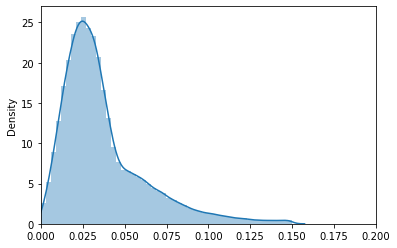

In [223]:
# this closer to the answer
# however, the angle is skewed larger because the initial jump at the begining 
theta = (dy_df.to_numpy().flatten()/dx_df.to_numpy().flatten())
ax = sns.distplot(theta[np.logical_and(theta>0,theta<0.15)])
ax.set_xlim(0,0.2)

In [224]:
# try computing the angle over displacements covering 10 or 20 frames as a rolling window. 
dt = 10
for t in range(10,80):
    pd.DataFrame((tmp.unstack(level=0)['x (um, imageStack)'].to_numpy().T - tmp.unstack(level=0)['x (um, imageStack)'].to_numpy().T[0]).T, index=_idx)

1.432394487827058

In [313]:
def df2xyz(df, fPath_frmt,fName):
    df.shape[0]
    with open(fPath_frmt.format(fName),'w') as f:
        f.write(str(df.shape[0]))
        f.write('\n#particleID ')
        df.to_csv(f,mode='w', sep=' ')
    return fPath_frmt.format(fName)

In [387]:
{'{}'.format(x) : '{} (um, rheo_SedHeight)'.format(x) for x in ['x','y','z']}['x']

'x (um, rheo_SedHeight)'

In [390]:
def computeDisplacement(df, t, dt, posKeys=None):
    if posKeys is None or posKeys == '(um, rheo_sedHeight)':
        posKeys = {'{}'.format(x) : '{} (um, rheo_sedHeight)'.format(x) for x in ['x','y','z']}
    elif posKeys == '(um, imageStack)':
        posKeys = {'{}'.format(x) : '{} (um, imageStack)'.format(x) for x in ['x','y','z']}
    tmp_unstack = df.unstack(level=0)
    dx = (tmp_unstack[posKeys['x']][t].to_numpy() - tmp_unstack[posKeys['x']][t+dt].to_numpy())
    dy = (tmp_unstack[posKeys['y']][t].to_numpy() - tmp_unstack[posKeys['y']][t+dt].to_numpy())
    #dy = (tmp.unstack(level=0)['y (um, imageStack)'][range(start,stop)].to_numpy() - tmp.unstack(level=0)['y (um, imageStack)'][range(start+dt, stop+dt)].to_numpy()).flatten()
    theta =  dy/dx*(180/np.pi)
    x,y,z = (tmp_unstack[posKeys['x']][t].to_numpy(), 
             tmp_unstack[posKeys['y']][t].to_numpy(),
             tmp_unstack[posKeys['z']][t].to_numpy())
    return pd.DataFrame({'x': x, 'y': y, 'z': z, 'dx': dx, 'dy': dy, 'theta': theta}, index = tmp_unstack.index)

In [381]:
t = 10
dt=35
start,stop = (0,55)
#start,stop = (40,70)
tmp_unstack = tmp.unstack(level=0)
fPath_frmt = '/Users/zsolt/Colloid/DATA/tfrGel10212018x/tfrGel10212018A_shearRun10292018f/ovito/track_grid/{}'
fName_frmt = 'grid_track_dt{:02}_t{:02}.xyz'
for t in range(start,stop):
    dx = (tmp_unstack['x (um, imageStack)'][t].to_numpy() - tmp_unstack['x (um, imageStack)'][t+dt].to_numpy())
    dy = (tmp_unstack['y (um, imageStack)'][t].to_numpy() - tmp_unstack['y (um, imageStack)'][t+dt].to_numpy())
    #dy = (tmp.unstack(level=0)['y (um, imageStack)'][range(start,stop)].to_numpy() - tmp.unstack(level=0)['y (um, imageStack)'][range(start+dt, stop+dt)].to_numpy()).flatten()
    theta =  dy/dx*(180/np.pi)
    x,y,z = (tmp_unstack['x (um, imageStack)'][t].to_numpy(), 
             tmp_unstack['y (um, imageStack)'][t].to_numpy(),
             tmp_unstack['z (um, imageStack)'][t].to_numpy())
    df = pd.DataFrame({'x': x, 'y': y, 'z': z, 'dx': dx, 'dy': dy, 'theta': theta}, index = tmp_unstack.index)
    df2xyz(df,fPath_frmt,fName_frmt.format(dt,t))

#ax = sns.distplot(180/np.pi*dy/dx)

<AxesSubplot:xlabel='x (um, imageStack)', ylabel='y (um, imageStack)'>

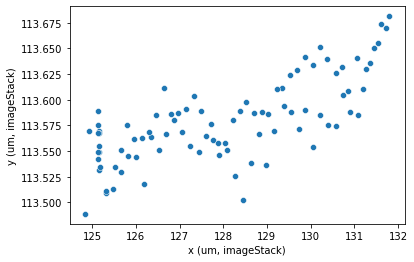

In [326]:
x = tmp.unstack(level=0).loc[805707]['x (um, imageStack)']
y = tmp.unstack(level=0).loc[805707]['y (um, imageStack)']
sns.scatterplot(data =tmp.unstack(level=0).loc[805707], x='x (um, imageStack)', y='y (um, imageStack)')

## Comments on determining shear angle
This is too complicated.

The distributions are unexpectedly complicated

I think its best to visualize the displacement field in ovito
>output: xpos ypos zpos theta dx dy dz

where xpos, ypos zpos are position
dx,dy,dz are displacements over 10 frames (moving window)
theta is the angle in the xy plane (y/x)
coordinate system is (um, rheo_SedHeight)

## Conclusions 

- There is systematic distortion in the angle across the image
- I think this is a consequence of the radial optical distortion in the image
- somewhat complicated pattern that has an effect on angle that is comparable to the misalgnment of the shear direction
- The microscope should be calibrated with regular dot pattern (Edmund optical)
- and a small sphere (~1mm in diameter) with fixed fluorescent particles attached.
- Together these calibrate the xy angluar distortions along with the height variations. 
- I am not exactly clear on how to determine the deformation field due to optics if you make a series of calibration measurements. 
- Like, what do with the image of the distorted grid? I would seek a function or algorithm to apply to the position vectors of located particles that map them back to the true positions.
- Is it as simple as a correction field to subtract or add? Ie the displacement field of the measured positions and the known true positions? Maybe linear interpolated to get rid of finite sampling.

# Rotate coordinate system and visualize tracer displacement of grid.

In [363]:
# set up the rotation dictionary
import yaml
from data_analysis import rotation
reload(rotation)

<module 'data_analysis.rotation' from '/Users/zsolt/Colloid_git/TractionRheoscopy/data_analysis/rotation.py'>

In [453]:
1.4*np.pi/180

0.024434609527920613

In [454]:
yamlTmp = """
rotationMatrix:
    coordStr: (um, rheo_sedHeight)
    handed: right
    positiveSignature: clockwise
    units: radians
    theta_x: 0 # rotation angle about x-axis
    theta_y: 0 # rotation angle about y-axis
    theta_z: 0.0244 # rotation angle about z-axis
"""
rotation_yaml = yaml.safe_load(yamlTmp)
theta_z = rotation_yaml['rotationMatrix']['theta_z']
rotDict = rotation.parseRotYaml(rotation_yaml['rotationMatrix'])
r_left = rotDict['prod_zyx (left)']
r_left

array([[ 0.99970233, -0.02439758,  0.        ],
       [ 0.02439758,  0.99970233,  0.        ],
       [ 0.        ,  0.        ,  1.        ]])

In [455]:
tmp

x (um, imageStack)  y (um, imageStack)  z (um, imageStack)  \
0  664925           70.650483           25.831199           84.790793   
   665370           79.422830           25.362258           84.120174   
   665394           89.826679           42.536789           84.198591   
   665400           90.349925           45.285455           84.198681   
   665404           59.681629            3.704263           84.283038   
...                       ...                 ...                 ...   
89 961917          195.025987          195.644019           83.167917   
   961918          186.553192          195.812523           83.099838   
   961967          212.847993          186.962579           83.143742   
   961971          210.483819          188.434780           83.268987   
   962032          187.543445          197.047749           83.333703   

              x_std     y_std     z_std  x (um, rheo_sedHeight)  \
0  664925  0.056462  0.056557  0.072860              -46.849517   
   665370  0.072270  0.070667  0.072193              -38.077170   
   665394  0.048513  0.046951  0.052895              -27.673321   
   665400  0.042119  0.043430  0.046652              -27.150075   
   665404  0.070583  0.073003  0.067517              -57.818371   
...             ...       ...       ...                     ...   
89 961917  0.062071  0.059886  0.083756               77.525987   
   961918  0.047849  0.046265  0.053468               69.053192   
   961967  0.047284  0.048090  0.056795               95.347993   
   961971  0.059983  0.059457  0.074504               92.983819   
   962032  0.047381  0.048082  0.055455               70.043445   

           y (um, rheo_sedHeight)  z (um, rheo_sedHeight)  
0  664925               91.668801              106.790793  
   665370               92.137742              106.120174  
   665394               74.963211              106.198591  
   665400               72.214545              106.198681  
   665404              113.795737              106.283038  
...                           ...                     ...  
89 961917              -78.144019              105.167917  
   961918              -78.312523              105.099838  
   961967              -69.462579              105.143742  
   961971              -70.934780              105.268987  
   962032              -79.547749              105.333703  

[182610 rows x 9 columns]

In [456]:
tmp_coordTransform = rotation.coordTransform(tmp, '(um, imageStack)', '(um, rheo_sedHeight)', z_offSet = 22)
tmp_coordTransform.xs(0)

,"x (um, imageStack)","y (um, imageStack)","z (um, imageStack)",x_std,y_std,z_std,"x (um, rheo_sedHeight)","y (um, rheo_sedHeight)","z (um, rheo_sedHeight)"
664925,70.650483,25.831199,84.790793,0.056462,0.056557,0.072860,-46.849517,91.668801,106.790793
665370,79.422830,25.362258,84.120174,0.072270,0.070667,0.072193,-38.077170,92.137742,106.120174
665394,89.826679,42.536789,84.198591,0.048513,0.046951,0.052895,-27.673321,74.963211,106.198591
665400,90.349925,45.285455,84.198681,0.042119,0.043430,0.046652,-27.150075,72.214545,106.198681
665404,59.681629,3.704263,84.283038,0.070583,0.073003,0.067517,-57.818371,113.795737,106.283038
...,...,...,...,...,...,...,...,...,...
961917,194.708113,195.563753,83.337767,0.055860,0.055653,0.071426,77.208113,-78.063753,105.337767
961918,186.207204,195.709508,83.383707,0.046898,0.046098,0.048897,68.707204,-78.209508,105.383707
961967,212.533052,186.871154,83.443813,0.052767,0.052686,0.059528,95.033052,-69.371154,105.443813
961971,210.124895,188.339940,83.516553,0.056619,0.054815,0.062005,92.624895,-70.839940,105.516553


In [457]:
df = rotation.rotatePosition(tmp_coordTransform,r_left)
df.unstack(level=0)['x (um, rheo_sedHeight)']

,0,1,2,3,4,5,6,7,8,9,...,80,81,82,83,84,85,86,87,88,89
664925,-49.072068,-48.966181,-48.759890,-48.565358,-48.385621,-48.234853,-48.082580,-47.879655,-47.682075,-47.527542,...,-48.728574,-48.732109,-48.736173,-48.714176,-48.735842,-48.762221,-48.766917,-48.755993,-48.759710,-48.747634
665370,-40.313774,-40.221745,-39.981687,-39.790108,-39.620585,-39.462283,-39.290389,-39.124922,-38.914086,-38.768844,...,-39.931096,-39.955033,-39.935715,-39.933523,-39.966561,-39.977760,-39.973698,-39.968211,-39.979741,-39.976424
665394,-29.494004,-29.376312,-29.176191,-28.977816,-28.812197,-28.652464,-28.477599,-28.288504,-28.097034,-27.946900,...,-29.105117,-29.122164,-29.099104,-29.113821,-29.126724,-29.150249,-29.144940,-29.139379,-29.132884,-29.130662
665400,-28.903853,-28.806253,-28.593615,-28.415519,-28.232918,-28.075539,-27.914430,-27.722226,-27.546922,-27.381421,...,-28.581518,-28.592706,-28.565504,-28.589841,-28.607905,-28.625129,-28.627763,-28.591663,-28.594323,-28.583113
665404,-60.577501,-60.462616,-60.232950,-60.054657,-59.881152,-59.710103,-59.527594,-59.351005,-59.171641,-59.002320,...,-60.201810,-60.192945,-60.193419,-60.192765,-60.216986,-60.217254,-60.239591,-60.213578,-60.239877,-60.236883
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
961917,79.089698,79.181693,79.404181,79.594012,79.773355,79.921868,80.084788,80.289791,80.471970,80.639145,...,79.434122,79.432166,79.435169,79.435458,79.413898,79.411863,79.391530,79.416923,79.409118,79.409435
961918,70.594875,70.711912,70.918778,71.098625,71.290427,71.446219,71.622657,71.801238,71.980231,72.153424,...,70.977484,70.954779,70.963273,70.968689,70.951447,70.942672,70.927466,70.954753,70.936223,70.943274
961967,96.697252,96.792672,97.010767,97.191640,97.377977,97.528019,97.701540,97.884645,98.077719,98.252088,...,97.048714,97.041979,97.047807,97.049476,97.029938,97.006469,97.013421,97.020514,97.006884,97.014330
961971,94.325647,94.469285,94.675606,94.859493,95.040639,95.181896,95.358032,95.553255,95.756811,95.903470,...,94.720348,94.698761,94.720868,94.716534,94.685907,94.679012,94.676977,94.698378,94.681282,94.686778


In [450]:
computeDisplacement(tmp_rot,2,10)

,x,y,z,dx,dy,theta
664925,-48.606017,90.555364,106.687897,-1.768601,0.031604,-1.023841
665370,-39.826703,91.201038,106.027919,-1.760609,0.006150,-0.200145
665394,-29.050001,74.253952,106.124125,-1.782225,-0.002705,0.086960
665400,-28.472002,71.560873,106.087599,-1.759975,0.021742,-0.707811
665404,-60.041933,112.413979,106.209751,-1.787630,0.028418,-0.910847
...,...,...,...,...,...,...
961917,79.274520,-76.338309,105.254840,-1.778632,0.002568,-0.082731
961918,70.788517,-76.684359,105.360238,-1.775866,0.024024,-0.775107
961967,96.896591,-67.244705,105.372773,-1.783003,0.029335,-0.942678
961971,94.558810,-68.784082,105.394872,-1.769242,0.001405,-0.045490


In [458]:
fPath_frmt = '/Users/zsolt/Colloid/DATA/tfrGel10212018x/tfrGel10212018A_shearRun10292018f/ovito/track_grid/{}'
fName_frmt = 'grid_track_rotated_1_4deg_dt{:02}_t{:02}.xyz'
start,stop = (0,55)
dt=35
tmp_rot = rotation.rotatePosition(tmp_coordTransform,r_left)
for t in range(start,stop):
    df = computeDisplacement(tmp_rot,t,dt)
    df2xyz(df,fPath_frmt,fName_frmt.format(dt,t))

# What is the spatial distribution of residual displacements?
- displacement of grid particle - avg displacment at that time
- displacement of grid particle - avg displacemet but in the x direction (it was "rotated" after all)

# SCRATCH

In [171]:
grid_idx.to_numpy().shape,np.unique(grid_idx.to_numpy()).shape

((1374,), (1368,))

In [63]:
[line.get(key) for key in ['{}0'.format(x) for x in ['z','y','x']] ]

[572, 0, 538]

In [65]:
grid_track.samplePtsLine(line,px2Micron=np.array([0.15,0.1150,115]))

array([[ 8.64300000e+01, -7.05870000e+01,  2.39200000e+04],
       [ 8.53800000e+01,  4.70580000e+01,  8.71700000e+04],
       [ 8.43300000e+01,  1.64703000e+02,  1.50420000e+05],
       ...,
       [-3.45257520e+05,  3.86932523e+07,  2.08028857e+10],
       [-3.45258570e+05,  3.86933699e+07,  2.08029489e+10],
       [-3.45259620e+05,  3.86934876e+07,  2.08030122e+10]])

In [314]:
235**2/160

345.15625